In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_data(data, c='c', label='', bins=100):
    plt.subplot(1, 1, 1)
    plt.hist(data,bins=bins, label='')
    plt.xticks(np.arange(0,1,0.05))
    plt.legend()
    plt.show()
def read_lines(fn, skip_strip=False):
    if not os.path.exists(fn):
        return []
    with open(fn, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return [s.strip() for s in lines if s.strip() or skip_strip]
def read_parallel_lines(fn1, fn2):
    lines1 = read_lines(fn1, skip_strip=True)
    lines2 = read_lines(fn2, skip_strip=True)
    assert len(lines1) == len(lines2)
    out_lines1, out_lines2 = [], []
    for line1, line2 in zip(lines1, lines2):
        if not line1.strip() or not line2.strip():
            continue
        else:
            out_lines1.append(line1)
            out_lines2.append(line2)
    return out_lines1, out_lines2

out_lines1, out_lines2 = read_parallel_lines('/home/ljh/GEC/QualityGec/data/wi_locness_train/train.src', '/home/ljh/GEC/QualityGec/data/wi_locness_train/train.tgt')

stage3_entropy = '/home/ljh/GEC/gector/data/legacy/stage3.entropy.npz'

In [9]:
def convert_entropy(entro):
    SCALE_CONSTANT = 9
    CONSTANT= np.exp(-SCALE_CONSTANT)
    converted = - np.log(entro + CONSTANT) / SCALE_CONSTANT
    converted = np.where(converted > CONSTANT, converted, CONSTANT)
    sentence_entropy = np.mean(converted)
    return sentence_entropy
def get_quality(data, i):
    if 'lengths' in data:
        output = data['data'][i]
        length = data['lengths'][i]
        return output[:length]
    else:
        return data['arr_' + str(i)]

entropy_dict = dict(np.load(stage3_entropy))

In [10]:
sent_entropy = []
for i in range(len(entropy_dict['lengths'])):
    data = get_quality(entropy_dict, i)
    data = data[:50]
    data = convert_entropy(data)
    sent_entropy.append(data)

In [11]:
print(len(sent_entropy))
sample_data = sent_entropy[:100000]

34304


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


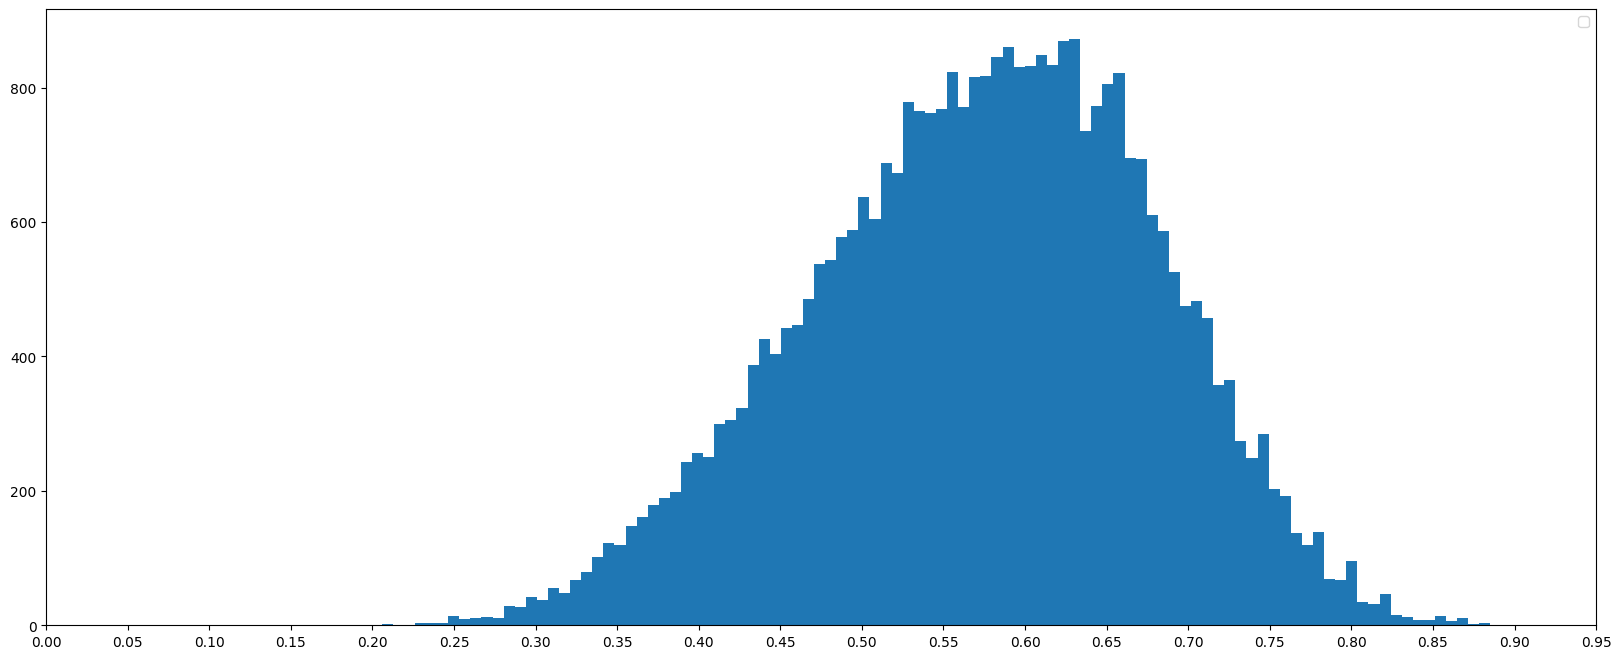

In [5]:
plt.figure(figsize=(20, 8))
plot_data(sample_data)

In [12]:
sorted_id = sorted(range(len(sample_data)), key=lambda k:sample_data[k])
sorted_id_wo_tn = []
for i in range(len(out_lines1)):
    if out_lines1[sorted_id[i]] == out_lines2[sorted_id[i]]:
        continue
    else:
        sorted_id_wo_tn.append(sorted_id[i]) 
print(sorted_id[:10], [sample_data[i] for i in sorted_id[:10]])
print(sorted_id_wo_tn[-10:], [sample_data[i] for i in sorted_id_wo_tn[-10:]])
print(sorted_id_wo_tn[-1000:-990], [sample_data[i] for i in sorted_id_wo_tn[-1000:-990]])
for i in sorted_id_wo_tn[-1000:-990]:
    print(i, sample_data[i], out_lines1[i],out_lines2[i])

print(sorted_id_wo_tn[:1000], [sample_data[i] for i in sorted_id_wo_tn[:1000]])
for i in sorted_id_wo_tn[:1000]:
    print(i, sample_data[i], out_lines1[i],out_lines2[i])

[1284, 22013, 3885, 9822, 5208, 9796, 1052, 10446, 22835, 18314] [0.20565313, 0.20914777, 0.21981217, 0.22831763, 0.23038904, 0.23101564, 0.23362271, 0.23771146, 0.23882216, 0.24008748]
[7160, 32469, 5155, 3271, 13817, 27542, 31905, 5112, 16839, 4431] [0.82858425, 0.8299341, 0.8311047, 0.8324901, 0.8372057, 0.84209067, 0.84638387, 0.8573707, 0.8586151, 0.86166275]
[30087, 703, 13460, 30130, 23968, 5962, 32414, 20939, 25180, 7066] [0.7020574, 0.7020608, 0.70206666, 0.70207435, 0.7021275, 0.702131, 0.70214325, 0.7021556, 0.70216256, 0.7022366]
30087 0.7020574 First of all , I would like to make it clear that " red " is not related to the colour only , this word also means " beautiful " in Russian . First of all , I would like to make it clear that " red " is not related to the colour only . This word also means " beautiful " in Russian .
703 0.7020608 My favourite sport is doing yoga . My favourite sport is yoga .
13460 0.70206666 I was born in July 25th 2003 . I was born on July 25th 20

: 

In [17]:
print(entropy_dict['lengths'][:10])
print(entropy_dict['lengths'][9822])

[13 12 17 20 17 48 23 31  7 15]
11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


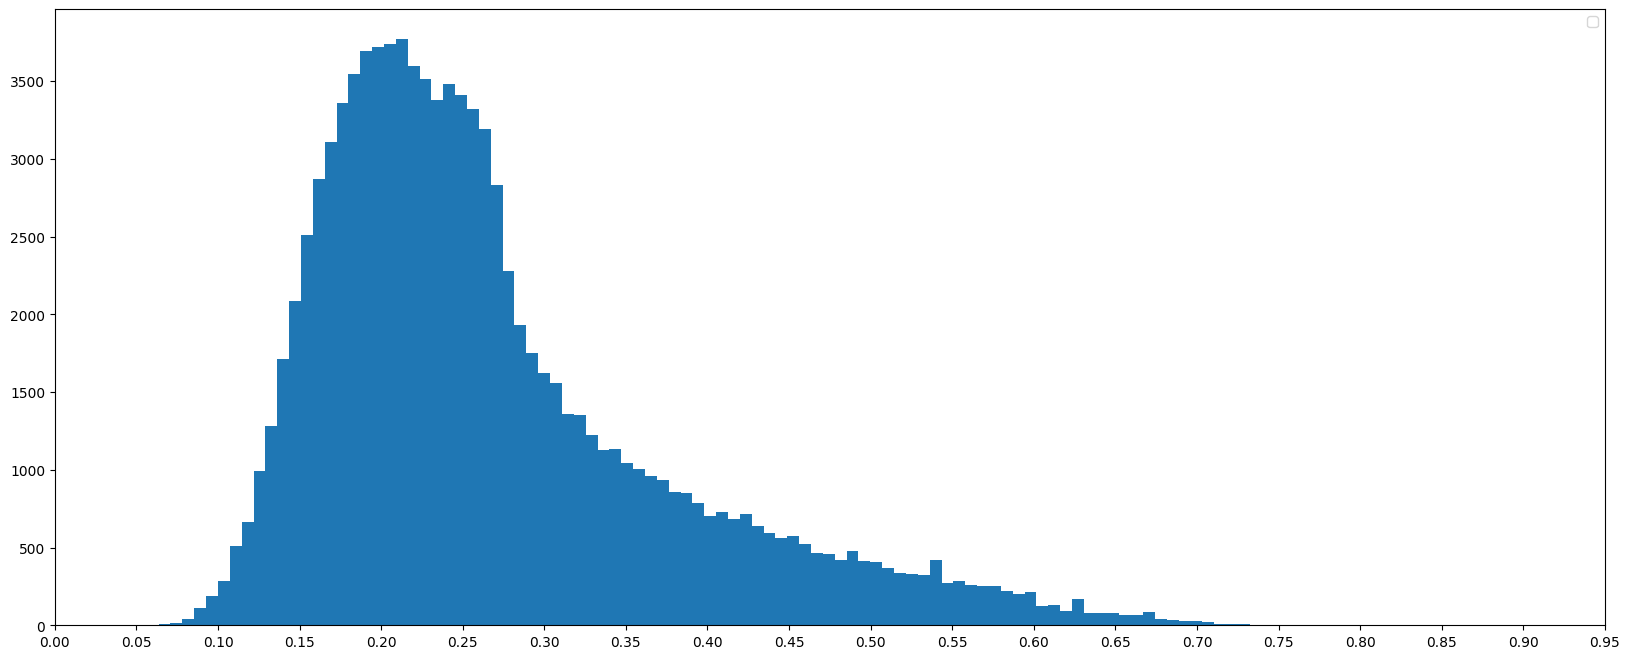

In [6]:
def convert_entropy(entro):
    SCALE_CONSTANT = 9
    CONSTANT= np.exp(-SCALE_CONSTANT)
    converted = - np.log(entro + CONSTANT) / SCALE_CONSTANT
    converted = np.where(converted > CONSTANT, converted, CONSTANT)
    sentence_entropy = np.min(converted)
    return sentence_entropy
def get_quality(data, i):
    if 'lengths' in data:
        output = data['data'][i]
        length = data['lengths'][i]
        return output[:length]
    else:
        return data['arr_' + str(i)]

entropy_dict = dict(np.load(stage3_entropy))
sample_data = []
for i in range(100000):
    data = get_quality(entropy_dict, i)
    data = data[:50]
    data = convert_entropy(data)
    sample_data.append(data)

plt.figure(figsize=(20, 8))
plot_data(sample_data)

In [7]:
print(entropy_dict['data'][entropy_dict['data'] > 0].min())
print(entropy_dict['data'][entropy_dict['data'] > 0].max())

3.2301481e-09
0.6204825


In [8]:
for i in range(10):
    data = get_quality(entropy_dict, i)
    print(data[:50])

[0.00295432 0.00324143 0.00222686 0.01133491 0.00977052 0.04951926
 0.22120242 0.21000881 0.29932225 0.17829466 0.03340912 0.00229312]
[0.00011184 0.00069829 0.00178744 0.00099155 0.00074179 0.00385576
 0.03410558 0.00713856 0.00163878 0.00063825 0.00111745 0.04892367
 0.0043925  0.08628728 0.04358376]
[0.01618436 0.10402726 0.01648683 0.1292628  0.1506616  0.35383636
 0.13905223 0.06301522 0.09752162 0.1691319  0.07416093 0.00555265]
[0.00041452 0.00037838 0.00282432 0.0008715  0.00101464 0.00182658
 0.0157775  0.00475805 0.0020836 ]
[0.00148938 0.0039349  0.08213533 0.00618505 0.04550632 0.00456086
 0.00358153 0.00242714]
[0.00017156 0.00015547 0.00035061 0.00354409 0.00033093 0.00187652
 0.00384241 0.08441885 0.09427928 0.00051086]
[0.00176095 0.09322868 0.00204947 0.0020478  0.04936536 0.03338939
 0.01108026 0.06655017 0.00343764 0.00226102 0.00096133 0.00263845
 0.00336026 0.00403231 0.02598029 0.06169561 0.04871968 0.09524408
 0.08494924 0.01733874 0.00546343 0.00314401 0.0138540

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


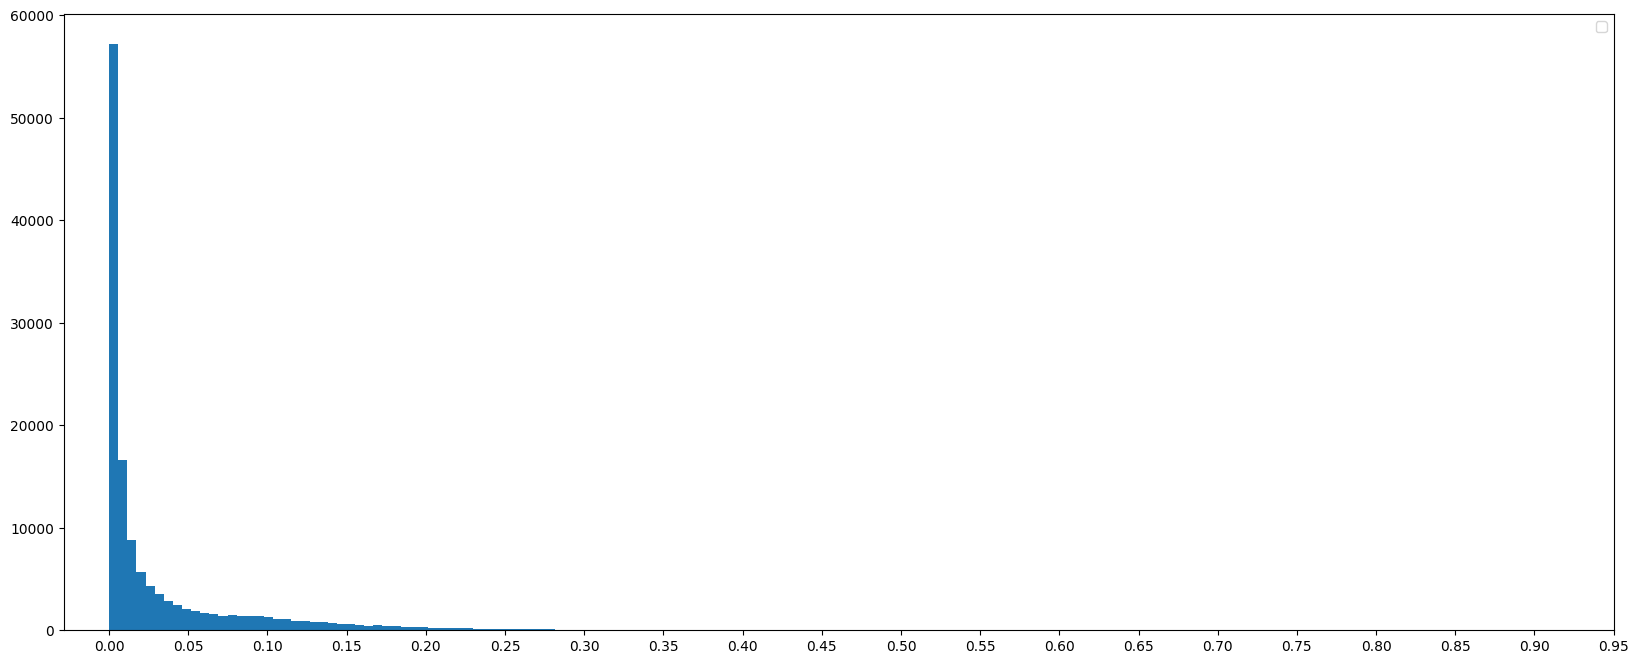

0.03279886


In [16]:
entropy_list = []
for i in range(10000):
    data = get_quality(entropy_dict, i)
    entropy_list.extend(data)
def plot_entropy(data, c='c', label='', bins=100):
    plt.subplot(1, 1, 1)
    plt.hist(data,bins=bins, label='')
    plt.xticks(np.arange(0,1,0.05))
    plt.legend()
    plt.show()
plt.figure(figsize=(20, 8))
plot_entropy(entropy_list)
print(np.mean(entropy_list))

In [17]:
for i in range(10):
    print(i, np.percentile(entropy_list, i))

0 4.286168405087665e-06
1 0.0001559819863177836
2 0.00024422816291917113
3 0.00032252308446913954
4 0.0003939279483165592
5 0.00046404762833844875
6 0.0005357876012567431
7 0.0006063822383293883
8 0.0006763245235197246
9 0.0007490918191615492


: 

# correct

In [3]:
stage3_correct = '/home/ljh/GEC/gector/data/legacy/stage3.correct_probs.npz'
correct_dict = dict(np.load(stage3_correct))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


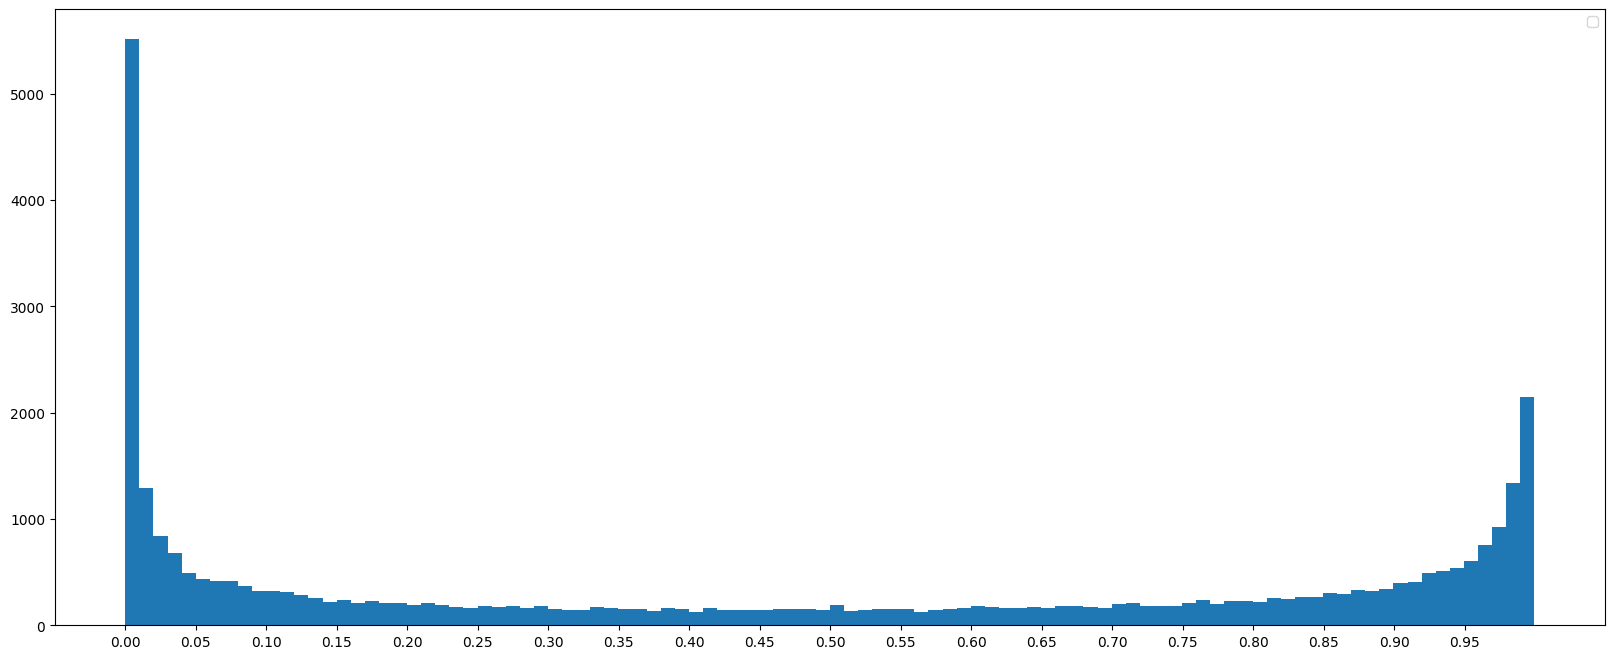

In [4]:
def get_quality(data, i):
    if 'lengths' in data:
        output = data['data'][i]
        length = data['lengths'][i]
        return output[:length]
    else:
        return data['arr_' + str(i)]
correct = []
for i in range(len(correct_dict['lengths'])):
    data = get_quality(correct_dict, i)
    correct.append(min(data))
plt.figure(figsize=(20, 8))
plot_data(correct)

In [9]:
print(len(correct))

34304


In [7]:
sorted_id = sorted(range(len(correct)), key=lambda k:correct[k])
sorted_id_wo_tn = []
for i in range(len(out_lines1)):
    if out_lines1[sorted_id[i]] == out_lines2[sorted_id[i]]:
        continue
    else:
        sorted_id_wo_tn.append(sorted_id[i]) 
print(sorted_id[:10], [correct[i] for i in sorted_id[:10]])
print(sorted_id_wo_tn[-10:], [correct[i] for i in sorted_id_wo_tn[-10:]])
print(sorted_id_wo_tn[-1000:-990], [correct[i] for i in sorted_id_wo_tn[-1000:-990]])
for i in sorted_id_wo_tn[-1000:-990]:
    print(i, out_lines1[i],out_lines2[i])

print(sorted_id_wo_tn[:1050], [correct[i] for i in sorted_id_wo_tn[:1050]])
for i in sorted_id_wo_tn[:1050]:
    print(i, out_lines1[i],out_lines2[i])

[19850, 1957, 9766, 22149, 23515, 16128, 24733, 10167, 18748, 18257] [5.8320854e-08, 7.494063e-08, 8.980763e-08, 1.168825e-07, 1.2542385e-07, 1.2929198e-07, 1.2936573e-07, 1.5969525e-07, 1.8028915e-07, 2.1342564e-07]
[21694, 4366, 3038, 23859, 5229, 2563, 10794, 33191, 2541, 5346] [0.99491996, 0.99520594, 0.99533844, 0.9953537, 0.9967661, 0.9968226, 0.9970319, 0.99712163, 0.9976568, 0.99778396]
[34170, 5119, 27909, 2207, 32369, 14790, 26229, 4622, 14904, 1932] [0.9246918, 0.9247014, 0.9247449, 0.9248135, 0.92482054, 0.9249627, 0.9250017, 0.925003, 0.92500395, 0.92503464]
34170 According to article " Nonverbal Communication : Speaking without Words " , eye contact is important because " insufficient eye contact can create communication barriers " . According to the article " Nonverbal Communication : Speaking without Words " , eye contact is important because " insufficient eye contact can create communication barriers " .
5119 My advice to anyone starting basketball is to never giving 

In [8]:
print(get_quality(correct_dict, 8936))
print(get_quality(correct_dict, 23771))
print(get_quality(correct_dict, 2207))
print(get_quality(correct_dict, 17524))

[9.9968982e-01 1.5397955e-04 9.9812108e-01 9.9007016e-01 9.9988472e-01
 9.9952006e-01 9.9768412e-01 9.9891853e-01 9.9900395e-01 9.9784148e-01
 9.9957794e-01]
[9.9720484e-01 9.9313122e-01 9.9945086e-01 9.9979240e-01 9.9589062e-01
 8.4161210e-01 9.9899048e-01 9.8740792e-01 4.8059887e-01 9.9098760e-01
 9.9116021e-01 9.7431445e-01 9.9858594e-01 9.9905533e-01 6.6576444e-04
 1.4449362e-04 9.9897647e-01]
[0.9962542  0.9248135  0.99757534 0.9664741  0.99565816 0.9851305
 0.99676055 0.99535453 0.99742365 0.9922495 ]
[9.9813324e-01 9.9899131e-01 9.8855513e-01 9.4970858e-01 1.4133623e-04
 8.1062549e-01 9.8186547e-01 9.9259263e-01 9.9889898e-01 9.7266698e-01
 9.5067191e-01 9.5366251e-01 9.8630029e-01 8.9424819e-01 9.9266714e-01
 9.8101246e-01 9.9728096e-01]
